In [36]:
# Required libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.use('Agg')

In [37]:
# Training data
train_data = pd.read_pickle('train_processed.pkl')

### Trying to predict Activity Index, Customer Relation Type Beginning Month, Foreigner Index, Residence Index and  Gender  on the basis of the given products

In [38]:
train_data.columns

Index(['Date', 'Date_Acc_Open', 'Customer_Code', 'Age', 'Customer_Seniority',
       'Household_Income', 'New_customer_index', 'Activity_Index_0.0',
       'Activity_Index_1.0', 'Customer_Relation_Type_Beginning_Month_A',
       'Customer_Relation_Type_Beginning_Month_I',
       'Customer_Relation_Type_Beginning_Month_N',
       'Customer_Relation_Type_Beginning_Month_P',
       'Customer_Relation_Type_Beginning_Month_R', 'Province_Name_ALAVA',
       'Province_Name_ALBACETE', 'Province_Name_ALICANTE',
       'Province_Name_ALMERIA', 'Province_Name_ASTURIAS',
       'Province_Name_AVILA', 'Province_Name_BADAJOZ',
       'Province_Name_BALEARS, ILLES', 'Province_Name_BARCELONA',
       'Province_Name_BIZKAIA', 'Province_Name_BURGOS',
       'Province_Name_CACERES', 'Province_Name_CADIZ',
       'Province_Name_CANTABRIA', 'Province_Name_CASTELLON',
       'Province_Name_CEUTA', 'Province_Name_CIUDAD REAL',
       'Province_Name_CORDOBA', 'Province_Name_CORUÑA, A',
       'Province_Name_C

In [39]:
# The names of input features
features = ['Saving_Account', 'Guarantees',
       'Current_Account', 'Derivada_Account', 'Payroll_Account',
       'Junior_Account', 'MAS_Particular_Account', 'Particular_Account',
       'Particular_Plus_Account', 'Short_Term_Deposit', 'Medium_Term_Deposit',
       'Long_Term_Deposit', 'E_Account', 'Funds', 'Mortgage', 'Pensions1',
       'Loans', 'Taxes', 'Credit_card', 'Securities', 'Home_Account',
       'Payroll', 'Pensions2', 'Direct_Debit']

In [40]:
#Merging of different columns of output
features_Sex= ['Sex_H', 'Sex_V']
features_Re= ['Residence_Index_N', 'Residence_Index_S']
features_Ac= ['Activity_Index_0.0', 'Activity_Index_1.0']
features_Seg= ['Segmentation_01 - TOP', 'Segmentation_02 - PARTICULARES','Segmentation_03 - UNIVERSITARIO']
features_customer_rel= ['Customer_Relation_Type_Beginning_Month_A', 'Customer_Relation_Type_Beginning_Month_I','Customer_Relation_Type_Beginning_Month_N','Customer_Relation_Type_Beginning_Month_P','Customer_Relation_Type_Beginning_Month_R']
Pro_Name= ['Province_Name_ALAVA', 'Province_Name_ALAVA','Province_Name_ALBACETE','Province_Name_ALMERIA','Province_Name_ALICANTE','Province_Name_ASTURIAS','Province_Name_AVILA','Province_Name_BADAJOZ','Province_Name_BALEARS, ILLES', 'Province_Name_BARCELONA','Province_Name_BIZKAIA', 'Province_Name_BURGOS','Province_Name_CACERES', 'Province_Name_CADIZ','Province_Name_CANTABRIA', 'Province_Name_CASTELLON','Province_Name_CEUTA','Province_Name_CIUDAD REAL','Province_Name_CORDOBA', 'Province_Name_CORUÑA, A','Province_Name_CUENCA', 'Province_Name_GIPUZKOA','Province_Name_GIRONA', 'Province_Name_GRANADA','Province_Name_GUADALAJARA','Province_Name_HUELVA','Province_Name_HUESCA', 'Province_Name_JAEN', 'Province_Name_LEON','Province_Name_LERIDA', 'Province_Name_LUGO', 'Province_Name_MADRID','Province_Name_MALAGA', 'Province_Name_MELILLA', 'Province_Name_MURCIA','Province_Name_NAVARRA', 'Province_Name_OURENSE','Province_Name_PALENCIA', 'Province_Name_PALMAS, LAS','Province_Name_PONTEVEDRA', 'Province_Name_RIOJA, LA','Province_Name_SALAMANCA', 'Province_Name_SANTA CRUZ DE TENERIFE','Province_Name_SEGOVIA', 'Province_Name_SEVILLA', 'Province_Name_SORIA','Province_Name_TARRAGONA', 'Province_Name_TERUEL','Province_Name_TOLEDO', 'Province_Name_VALENCIA','Province_Name_VALLADOLID', 'Province_Name_ZAMORA','Province_Name_ZARAGOZA']


([array([338906.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0., 276255.]),
  array([276255.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0., 338906.])],
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 Lists of Patches objects>)

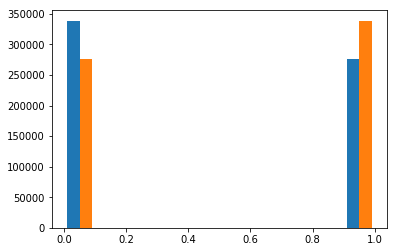

In [41]:
#Checking Imbalance in Gender
X_gender = train_data[features].astype('int').values
y_gender = train_data[features_Sex].astype('int').values
plt.hist(y_gender)

([array([ 26900.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0., 588261.]),
  array([588261.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,  26900.])],
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 Lists of Patches objects>)

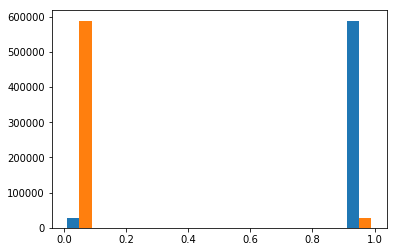

In [42]:
#Imbalance in Foreign index

foreign_i = ['Foreigner_Index_N','Foreigner_Index_S']
X_Foreigner_Index = train_data[features].astype('int').values
y_Foreigner_Index = train_data[foreign_i].astype('int').values
plt.hist(y_Foreigner_Index)

(array([588261.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 588261.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

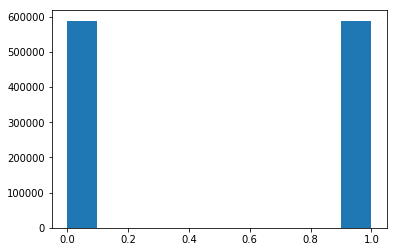

In [43]:
# Oversampling to decrease imbalance in product columns for Foreigner Index
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_Foreigner_Index,y_Foreigner_Index = sm.fit_sample(train_data[features].astype('int').values, train_data['Foreigner_Index_N'].astype('int').values)

plt.hist(y_Foreigner_Index)


([array([611482.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,   3679.]),
  array([  3679.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0., 611482.])],
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 Lists of Patches objects>)

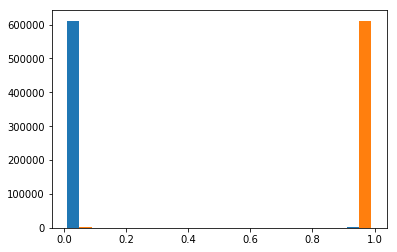

In [44]:
#Imbalance in Residence_Index_N
X_Residence_Index = train_data[features].astype('int').values
y_Residence_Index = train_data[features_Re].astype('int').values
plt.hist(y_Residence_Index)

(array([611482.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 611482.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

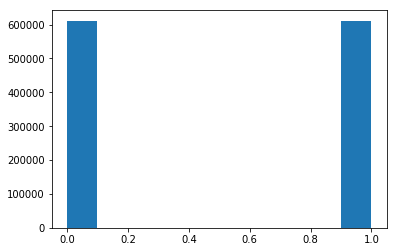

In [45]:
# Oversampling to decrease imbalance in product columns for Foreigner Index
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_Residence_Index,y_Residence_Index = sm.fit_sample(train_data[features].astype('int').values, train_data['Residence_Index_N'].astype('int').values)

plt.hist(y_Residence_Index)


([array([333486.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0., 281675.]),
  array([281675.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0., 333486.])],
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 Lists of Patches objects>)

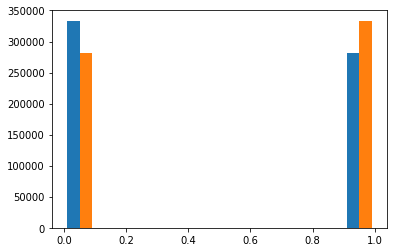

In [46]:
#Activity_Index_1.0
X_Activity_Index = train_data[features].astype('int').values
y_Activity_Index = train_data[features_Ac].astype('int').values
plt.hist(y_Activity_Index)

# From Histogram we can observe that the data is balanced

([array([584989.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,  30172.]),
  array([256513.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0., 358648.]),
  array([388820.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0., 226341.])],
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 3 Lists of Patches objects>)

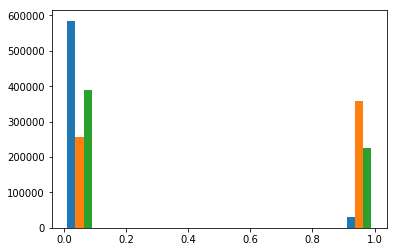

In [47]:
#Imbalance in segmentation
X_Seg=train_data[features].astype('int').values
y_seg=train_data[features_Seg].astype('int').values
plt.hist(y_seg)

([array([294758.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0., 320403.]),
  array([320427.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0., 294734.]),
  array([615161.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,      0.]),
  array([6.15137e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.40000e+01]),
  array([615161.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,      0.])],
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 5 Lists of Patches objects>)

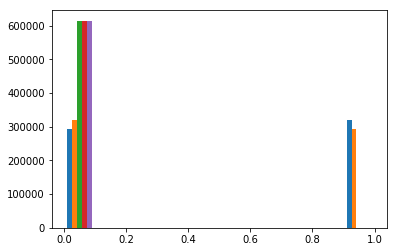

In [48]:
#Customer_Relation_Type_Beginning_Month
X_Cust_Rel=train_data[features].astype('int').values
y_Cust_Rel=train_data[features_customer_rel].astype('int').values
plt.hist(y_Cust_Rel)

In [49]:
# Predting Gender from given products
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train_gender, X_test_gender, y_train_gender, y_test_gender= train_test_split(X_gender, y_gender ,test_size=0.33, random_state=0)

neural_net_gender = MLPClassifier()
neural_net_gender.fit(X_train_gender,y_train_gender)
print('Accuracy_Score = ',neural_net_gender.score(X_test_gender,y_test_gender))
n_pr_gender=neural_net_gender.predict(X_test_gender)
pred_prob_neural_net_gender = neural_net_gender.predict_proba(X_test_gender)
print(pred_prob_neural_net_gender)

Accuracy_Score =  0.5590136154952612
[[0.51013507 0.48909266]
 [0.51013507 0.48909266]
 [0.38258733 0.61671354]
 ...
 [0.51013507 0.48909266]
 [0.30828816 0.6936319 ]
 [0.38258733 0.61671354]]


In [50]:
# Log loss for Gender
from sklearn.metrics import log_loss
log_loss(y_test_gender,pred_prob_neural_net_gender)

0.6772509453381067

In [51]:
#Classification Report and confusion matrix -gender

from sklearn.metrics import classification_report
print("classification_report for gender:")
print(classification_report(y_test_gender,n_pr_gender))

classification_report for gender:
              precision    recall  f1-score   support

           0       0.51      0.61      0.55     91295
           1       0.62      0.52      0.57    111709

   micro avg       0.56      0.56      0.56    203004
   macro avg       0.56      0.56      0.56    203004
weighted avg       0.57      0.56      0.56    203004
 samples avg       0.56      0.56      0.56    203004



In [52]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train_Fr_Index, X_test_Fr_Index, y_train_Fr_Index, y_test_Fr_Index= train_test_split(X_Foreigner_Index, y_Foreigner_Index ,test_size=0.33, random_state=0)

neural_Fr_Index = MLPClassifier(hidden_layer_sizes=(12),warm_start=True,learning_rate='adaptive')
neural_Fr_Index.fit(X_train_Fr_Index,y_train_Fr_Index)
print('Accuracy_Score_Fr_Index = ',neural_Fr_Index.score(X_test_Fr_Index,y_test_Fr_Index))
n_pr_Fr_Index=neural_Fr_Index.predict(X_test_Fr_Index)
print(n_pr_Fr_Index)
print(y_test_Fr_Index)

pred_prob_neural_Fr_Index = neural_Fr_Index.predict_proba(X_test_Fr_Index)
print(pred_prob_neural_Fr_Index)

Accuracy_Score_Fr_Index =  0.5747334856395185
[0 0 0 ... 0 0 0]
[1 1 0 ... 1 0 0]
[[0.51930452 0.48069548]
 [0.51930452 0.48069548]
 [0.51930452 0.48069548]
 ...
 [0.51930452 0.48069548]
 [0.67436823 0.32563177]
 [0.51930452 0.48069548]]


In [53]:
# Log loss for foreign index
from sklearn.metrics import log_loss
log_loss(y_test_Fr_Index,pred_prob_neural_Fr_Index)

0.6611199397195602

In [54]:
#Classification Report and confusion matrix -foreign

from sklearn.metrics import classification_report
print("classification_report for Foreign Index:")
print(classification_report(y_test_Fr_Index,n_pr_Fr_Index))



from sklearn.metrics import confusion_matrix
M_FI=confusion_matrix(y_test_Fr_Index,n_pr_Fr_Index)
print("Confusion matrix for model_neural nets_Foreign Index:")
print(M_FI)

classification_report for Foreign Index:
              precision    recall  f1-score   support

           0       0.55      0.82      0.66    194186
           1       0.65      0.33      0.43    194067

   micro avg       0.57      0.57      0.57    388253
   macro avg       0.60      0.57      0.55    388253
weighted avg       0.60      0.57      0.55    388253

Confusion matrix for model_neural nets_Foreign Index:
[[159994  34192]
 [130919  63148]]


In [55]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train_Re_Index, X_test_Re_Index, y_train_Re_Index, y_test_Re_Index= train_test_split(X_Residence_Index,y_Residence_Index ,test_size=0.33, random_state=0)

neural_Re_Index = MLPClassifier()
neural_Re_Index.fit(X_train_Re_Index,y_train_Re_Index)
print('Accuracy_Score_Re_Index = ',neural_Re_Index.score(X_test_Re_Index,y_test_Re_Index))
n_pr_Re_Index=neural_Re_Index.predict(X_test_Re_Index)
print(n_pr_Re_Index)
print(y_test_Re_Index)
pred_prob_neural_Re_Index = neural_Re_Index.predict_proba(X_test_Re_Index)
print(pred_prob_neural_Re_Index)

Accuracy_Score_Re_Index =  0.6382789986594942
[0 1 0 ... 1 0 0]
[1 1 1 ... 1 0 0]
[[0.52414983 0.47585017]
 [0.15269659 0.84730341]
 [0.52414983 0.47585017]
 ...
 [0.3839223  0.6160777 ]
 [0.52414983 0.47585017]
 [0.52414983 0.47585017]]


In [56]:
# Log loss for Residence index
from sklearn.metrics import log_loss
log_loss(y_test_Re_Index,pred_prob_neural_Re_Index)

0.6003080503239386

In [57]:
#Classification Report and confusion matrix -Activity Index

from sklearn.metrics import classification_report
print("classification_report for Residence Index:")
print(classification_report(y_test_Re_Index,n_pr_Re_Index))


classification_report for Residence Index:
              precision    recall  f1-score   support

           0       0.60      0.80      0.69    201480
           1       0.70      0.48      0.57    202099

   micro avg       0.64      0.64      0.64    403579
   macro avg       0.65      0.64      0.63    403579
weighted avg       0.65      0.64      0.63    403579



In [58]:
#Activity Index
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train_Ac_Index, X_test_Ac_Index, y_train_Ac_Index, y_test_Ac_Index= train_test_split(X_Activity_Index,y_Activity_Index ,test_size=0.33, random_state=0)

neural_Ac_Index = MLPClassifier(learning_rate = "adaptive")
neural_Ac_Index.fit(X_train_Ac_Index,y_train_Ac_Index)
print('Accuracy_Score_Ac_Index = ',neural_Ac_Index.score(X_test_Ac_Index,y_test_Ac_Index))
n_pr_Ac_Index=neural_Ac_Index.predict(X_test_Ac_Index)
print(n_pr_Ac_Index)
print(y_test_Ac_Index)
pred_prob_neural_Ac_Index = neural_Ac_Index.predict_proba(X_test_Ac_Index)
print(pred_prob_neural_Ac_Index)


Accuracy_Score_Ac_Index =  0.7603643277964967
[[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [0 1]
 [0 1]]
[[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [0 1]
 [0 1]]
[[0.6691574  0.33033519]
 [0.6691574  0.33033519]
 [0.35124609 0.65141246]
 ...
 [0.6691574  0.33033519]
 [0.00272679 0.99738336]
 [0.35124609 0.65141246]]


In [59]:
# Log loss for Activity index
from sklearn.metrics import log_loss
log_loss(y_test_Ac_Index,pred_prob_neural_Ac_Index)

0.48105818887189344

In [60]:
#Classification Report and confusion matrix -Activity Index

from sklearn.metrics import classification_report
print("classification_report for Residence Index:")
print(classification_report(y_test_Ac_Index,n_pr_Ac_Index))


classification_report for Residence Index:
              precision    recall  f1-score   support

           0       0.68      0.90      0.78     93239
           1       0.88      0.64      0.74    109765

   micro avg       0.76      0.76      0.76    203004
   macro avg       0.78      0.77      0.76    203004
weighted avg       0.79      0.76      0.76    203004
 samples avg       0.76      0.76      0.76    203004



In [61]:
# customer Segmentation
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score

X_train_seg, X_test_seg, y_train_seg, y_test_seg= train_test_split(X_Seg,y_seg,test_size=0.33, random_state=0)

neural_seg = MLPClassifier()
neural_seg.fit(X_train_seg,y_train_seg)
print('Accuracy_Score_seg = ',neural_seg.score(X_test_seg,y_test_seg))
n_pr_seg=neural_seg.predict(X_test_seg)
print(n_pr_seg)
print(y_test_seg)

pred_prob_neural_Seg = neural_seg.predict_proba(X_test_seg)
print(pred_prob_neural_Seg)


Accuracy_Score_seg =  0.7326308841205099
[[0 0 1]
 [0 0 1]
 [0 1 0]
 ...
 [0 0 1]
 [1 0 0]
 [0 1 0]]
[[0 0 1]
 [0 0 1]
 [0 1 0]
 ...
 [0 0 1]
 [0 1 0]
 [0 1 0]]
[[0.0023742  0.35727495 0.64378925]
 [0.0023742  0.35727495 0.64378925]
 [0.01449493 0.97318614 0.01403851]
 ...
 [0.0023742  0.35727495 0.64378925]
 [0.65430089 0.34433411 0.00811534]
 [0.01449493 0.97318614 0.01403851]]


In [62]:
# Log loss for Segmentation
from sklearn.metrics import log_loss
log_loss(y_test_seg,pred_prob_neural_Seg)

0.5418104356586345

In [63]:
#Classification Report and confusion matrix -Segmentation

from sklearn.metrics import classification_report
print("classification_report for Segmentation:")
print(classification_report(y_test_seg,n_pr_seg))


classification_report for Segmentation:
              precision    recall  f1-score   support

           0       0.63      0.24      0.35      9930
           1       0.85      0.66      0.74    118136
           2       0.64      0.91      0.75     74938

   micro avg       0.73      0.73      0.73    203004
   macro avg       0.71      0.61      0.61    203004
weighted avg       0.76      0.73      0.73    203004
 samples avg       0.73      0.73      0.73    203004



In [64]:
#Customer Relation Type at the beginning of the month
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

X_train_Cr, X_test_Cr, y_train_Cr, y_test_Cr= train_test_split(X_Cust_Rel,y_Cust_Rel,test_size=0.33, random_state=0)

neural_Cr = MLPClassifier(hidden_layer_sizes=(12,6),learning_rate='adaptive')
neural_Cr.fit(X_train_Cr,y_train_Cr)
print('Accuarcy_Score_Cr = ',neural_Cr.score(X_test_Cr,y_test_Cr))
n_pr_Cr=neural_Cr.predict(X_test_Cr)
pred_prob_neural_Cr = neural_Cr.predict_proba(X_test_Cr)
print(pred_prob_neural_Cr)

Accuarcy_Score_Cr =  0.768541506571299
[[2.95952154e-01 7.04119581e-01 1.48631945e-09 4.50866326e-05
  1.25657459e-09]
 [2.95952154e-01 7.04119581e-01 1.48631945e-09 4.50866326e-05
  1.25657459e-09]
 [6.14410537e-01 3.85332570e-01 1.46557318e-09 4.00694347e-05
  1.24151287e-09]
 ...
 [2.95952154e-01 7.04119581e-01 1.48631945e-09 4.50866326e-05
  1.25657459e-09]
 [9.99900236e-01 9.97701195e-05 1.28634236e-09 1.63869526e-07
  1.11023743e-09]
 [6.14410537e-01 3.85332570e-01 1.46557318e-09 4.00694347e-05
  1.24151287e-09]]


In [66]:
# Log loss for Customer Relation Type
from sklearn.metrics import log_loss
log_loss(y_test_Cr,pred_prob_neural_Cr)

0.47593831503929335

In [67]:
#Classification Report and confusion matrix -Customer Relationship Type At the beginning of the month


from sklearn.metrics import classification_report
print("classification_report for Relation Type:")
print(classification_report(y_test_Cr,n_pr_Cr))


classification_report for Relation Type:
              precision    recall  f1-score   support

           0       0.87      0.65      0.75    105523
           1       0.70      0.89      0.79     97471
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         0

   micro avg       0.77      0.77      0.77    203004
   macro avg       0.31      0.31      0.31    203004
weighted avg       0.79      0.77      0.77    203004
 samples avg       0.77      0.77      0.77    203004

